In [1]:
%pip install networkx[default]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/Postings_01052019_15052019.csv', sep=';')

In [4]:
df.head()

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity  \
0  1041073586       1.041073e+09                671476   
1  1041073839       1.041073e+09                566938   
2  1041073872       1.041069e+09                669286   
3  1041080734       1.041080e+09                671476   
4  1041080828                NaN                671476   

                                     PostingHeadline  \
0  Das hat gestern bereits der Voggenhuber angefü...   
1                                                NaN   
2                                                NaN   
3                  Sie haben doch nichts gefordert??   
4  Heute wäre der perfekte Tag für die SPÖ gewese...   

                                      PostingComment         PostingCreatedAt  \
0  schieder hatte dem inhaltlich nichts entgegenz...  2019-05-01 18:21:15.127   
1     ...und meinen Bezirk bekommst du als Erbe mit.  2019-05-01 18:28:22.040   
2  Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...  2019-05-01 18:29:05.533   
3  sie haben nur die regierung kritisiert. das di...  2019-05-01 22:37:56.010   
4  ihr noch nicht erfülltes versprechen, den silb...  2019-05-01 22:42:06.310   

      ID_Article   ArticlePublishingDate  \
0  2000102330973  2019-05-01 10:28:57.49   
1  2000102330973  2019-05-01 10:28:57.49   
2  2000102330973  2019-05-01 10:28:57.49   
3  2000102330973  2019-05-01 10:28:57.49   
4  2000102330973  2019-05-01 10:28:57.49   

                                        ArticleTitle ArticleChannel  \
0  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4  1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   

  ArticleRessortName UserCommunityName UserGender            UserCreatedAt  
0           Parteien       Ravenspower        NaN  2018-04-14 13:42:28.470  
1           Parteien        AlphaRomeo          m  2015-08-28 17:07:41.110  
2           Parteien        Hpolditsch        NaN  2018-03-06 20:03:42.737  
3           Parteien       Ravenspower        NaN  2018-04-14 13:42:28.470  
4           Parteien       Ravenspower        NaN  2018-04-14 13:42:28.470

In [5]:
df2 = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';')
df2.head()

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity  \
0  1041515171                NaN                182351   
1  1041515292       1.041515e+09                182351   
2  1041515412       1.041514e+09                182351   
3  1041596110       1.041589e+09                630965   
4  1041544483       1.041544e+09                 36135   

                                     PostingHeadline  \
0  da hat er aber recht ...auch wenn hier nun ein...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                      PostingComment         PostingCreatedAt  \
0  denn Österreich ist von lauter sicheren (EU) L...  2019-05-16 11:25:39.287   
1  außer von den Naiven die aus 2015 nichts geler...  2019-05-16 11:28:44.703   
2  no dan schrieb man auch schon hier ma https://...  2019-05-16 11:31:31.110   
3  ein verbrechersyndikat zeigt dem volk auch, da...  2019-05-18 10:12:47.417   
4  Und sie denken (?) illegalität schützt vor dem...  2019-05-16 23:11:43.447   

      ID_Article   ArticlePublishingDate  \
0  2000103241947  2019-05-16 10:57:22.00   
1  2000103241947  2019-05-16 10:57:22.00   
2  2000103241947  2019-05-16 10:57:22.00   
3  2000103378024  2019-05-18 07:43:14.23   
4  2000103287009  2019-05-16 18:42:18.00   

                                        ArticleTitle ArticleChannel  \
0  Innenminister Kickl will überhaupt keine Asyla...         Inland   
1  Innenminister Kickl will überhaupt keine Asyla...         Inland   
2  Innenminister Kickl will überhaupt keine Asyla...         Inland   
3  Kurz ist mit der FPÖ gescheitert – und will tr...        Meinung   
4  Abtreibungsverbot in Alabama: Frauen werden st...        Meinung   

    ArticleRessortName UserCommunityName UserGender            UserCreatedAt  
0  Integrationspolitik  nadaschauichaber          m  2012-11-25 15:09:03.087  
1  Integrationspolitik  nadaschauichaber          m  2012-11-25 15:09:03.087  
2  Integrationspolitik  nadaschauichaber          m  2012-11-25 15:09:03.087  
3        Hans Rauscher           ma heix        NaN  2017-04-09 18:41:15.267  
4          Bianca Blei        BlackAdder          m  2003-02-23 10:21:54.000

In [6]:
postings = pd.concat([df, df2])
postings

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity  \
0       1041073586       1.041073e+09                671476   
1       1041073839       1.041073e+09                566938   
2       1041073872       1.041069e+09                669286   
3       1041080734       1.041080e+09                671476   
4       1041080828                NaN                671476   
...            ...                ...                   ...   
395929  1042380731       1.042380e+09                553628   
395930  1042381030                NaN                553628   
395931  1042381528       1.042381e+09                553628   
395932  1042381793       1.042380e+09                553628   
395933  1042389523       1.042389e+09                553628   

                                          PostingHeadline  \
0       Das hat gestern bereits der Voggenhuber angefü...   
1                                                     NaN   
2                                                     NaN   
3                       Sie haben doch nichts gefordert??   
4       Heute wäre der perfekte Tag für die SPÖ gewese...   
...                                                   ...   
395929                                                NaN   
395930                                                NaN   
395931                                                NaN   
395932                                                NaN   
395933                                                NaN   

                                           PostingComment  \
0       schieder hatte dem inhaltlich nichts entgegenz...   
1          ...und meinen Bezirk bekommst du als Erbe mit.   
2       Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...   
3       sie haben nur die regierung kritisiert. das di...   
4       ihr noch nicht erfülltes versprechen, den silb...   
...                                                   ...   
395929  Vermutlich gar keines...mir ist jedenfalls kei...   
395930  *winkt dankbar zur Gödelnummer* Du bist echt d...   
395931  Die sind noch in Arbeit, aber der Surface läuf...   
395932  Ich versteh das überhaupt nicht, warum so viel...   
395933  Das war der erste von vielen, den ich gecheckt...   

               PostingCreatedAt     ID_Article   ArticlePublishingDate  \
0       2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
1       2019-05-01 18:28:22.040  2000102330973  2019-05-01 10:28:57.49   
2       2019-05-01 18:29:05.533  2000102330973  2019-05-01 10:28:57.49   
3       2019-05-01 22:37:56.010  2000102330973  2019-05-01 10:28:57.49   
4       2019-05-01 22:42:06.310  2000102330973  2019-05-01 10:28:57.49   
...                         ...            ...                     ...   
395929  2019-06-04 08:54:54.177  2000103620997  2019-05-24 09:01:27.00   
395930  2019-06-04 09:04:32.037  2000103620997  2019-05-24 09:01:27.00   
395931  2019-06-04 09:22:54.473  2000103620997  2019-05-24 09:01:27.00   
395932  2019-06-04 09:31:45.077  2000103620997  2019-05-24 09:01:27.00   
395933  2019-06-04 13:09:09.613  2000103620997  2019-05-24 09:01:27.00   

                                             ArticleTitle ArticleChannel  \
0       1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1       1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2       1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3       1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4       1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
...                                                   ...            ...   
395929                               Off-Topic-Forum #123           User   
395930                               Off-Topic-Forum #123           User   
395931                               Off-Topic-Forum #123           User   
395932                               Off-Topic-Forum #123           User   
395933                               Off-Topic-Forum #123   

In [7]:
votes1 = pd.read_csv('data/Votes_01052019_15052019.csv', sep=';')
votes2 = pd.read_csv('data/Votes_16052019_31052019.csv', sep=';')
votes = pd.concat([votes1, votes2])
votes

ID_CommunityIdentity  ID_Posting  VoteNegative  VotePositive  \
0                      675862  1041076570             1             0   
1                      689023  1041076570             1             0   
2                       24810  1041076745             0             1   
3                      673781  1041076745             0             1   
4                       24810  1041076831             0             1   
...                       ...         ...           ...           ...   
2254242                553628  1042362731             0             1   
2254243                553628  1042362772             0             1   
2254244                553628  1042363572             0             1   
2254245                503247  1042366280             0             1   
2254246                553628  1042368779             0             1   

                   VoteCreatedAt    UserCommunityName UserGender  \
0        2019-05-06 16:47:46.883  Heckscheibenwischer          m   
1        2019-05-01 22:19:06.240      Heinz Fettleber        NaN   
2        2019-05-01 23:54:54.600       Bruce Campbell          m   
3        2019-05-01 20:59:29.910         Erdäpfelsack        NaN   
4        2019-05-01 23:51:42.730       Bruce Campbell          m   
...                          ...                  ...        ...   
2254242  2019-06-03 17:47:17.467        404 not found        NaN   
2254243  2019-06-03 17:48:07.213        404 not found        NaN   
2254244  2019-06-03 17:46:52.170        404 not found        NaN   
2254245  2019-06-03 20:50:24.820              Scorpio          m   
2254246  2019-06-03 20:11:51.247        404 not found        NaN   

                   UserCreatedAt  
0        2018-06-26 06:04:30.513  
1        2019-03-08 21:23:11.463  
2        2011-01-12 16:50:40.597  
3        2018-05-29 07:13:49.350  
4        2011-01-12 16:50:40.597  
...                          ...  
2254242  2014-12-06 15:15:06.280  
2254243  2014-12-06 15:15:06.280  
2254244  2014-12-06 15:15:06.280  
2254245  2012-12-19 10:42:30.780  
2254246  2014-12-06 15:15:06.280  

[3824984 rows x 8 columns]

In [8]:
merged_df = pd.merge(postings, votes, on="ID_Posting")
merged_df

ID_Posting  ID_Posting_Parent  ID_CommunityIdentity_x  \
0        1041073586       1.041073e+09                  671476   
1        1041073586       1.041073e+09                  671476   
2        1041073586       1.041073e+09                  671476   
3        1041080734       1.041080e+09                  671476   
4        1041080734       1.041080e+09                  671476   
...             ...                ...                     ...   
3824979  1042381528       1.042381e+09                  553628   
3824980  1042381528       1.042381e+09                  553628   
3824981  1042381793       1.042380e+09                  553628   
3824982  1042389523       1.042389e+09                  553628   
3824983  1042389523       1.042389e+09                  553628   

                                           PostingHeadline  \
0        Das hat gestern bereits der Voggenhuber angefü...   
1        Das hat gestern bereits der Voggenhuber angefü...   
2        Das hat gestern bereits der Voggenhuber angefü...   
3                        Sie haben doch nichts gefordert??   
4                        Sie haben doch nichts gefordert??   
...                                                    ...   
3824979                                                NaN   
3824980                                                NaN   
3824981                                                NaN   
3824982                                                NaN   
3824983                                                NaN   

                                            PostingComment  \
0        schieder hatte dem inhaltlich nichts entgegenz...   
1        schieder hatte dem inhaltlich nichts entgegenz...   
2        schieder hatte dem inhaltlich nichts entgegenz...   
3        sie haben nur die regierung kritisiert. das di...   
4        sie haben nur die regierung kritisiert. das di...   
...                                                    ...   
3824979  Die sind noch in Arbeit, aber der Surface läuf...   
3824980  Die sind noch in Arbeit, aber der Surface läuf...   
3824981  Ich versteh das überhaupt nicht, warum so viel...   
3824982  Das war der erste von vielen, den ich gecheckt...   
3824983  Das war der erste von vielen, den ich gecheckt...   

                PostingCreatedAt     ID_Article   ArticlePublishingDate  \
0        2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
1        2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
2        2019-05-01 18:21:15.127  2000102330973  2019-05-01 10:28:57.49   
3        2019-05-01 22:37:56.010  2000102330973  2019-05-01 10:28:57.49   
4        2019-05-01 22:37:56.010  2000102330973  2019-05-01 10:28:57.49   
...                          ...            ...                     ...   
3824979  2019-06-04 09:22:54.473  2000103620997  2019-05-24 09:01:27.00   
3824980  2019-06-04 09:22:54.473  2000103620997  2019-05-24 09:01:27.00   
3824981  2019-06-04 09:31:45.077  2000103620997  2019-05-24 09:01:27.00   
3824982  2019-06-04 13:09:09.613  2000103620997  2019-05-24 09:01:27.00   
3824983  2019-06-04 13:09:09.613  2000103620997  2019-05-24 09:01:27.00   

                                              ArticleTitle ArticleChannel  \
0        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
1        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
2        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
3        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
4        1. Mai in Wien: SPÖ fordert von Strache Rücktritt         Inland   
...                                                    ...            ...   
3824979                               Off-Topic-Forum #123           User   
3824980                               Off-Topic-Forum #123           User   
3824981                               Off-Topic-Forum #123           User   
3824982                               Off-Topic-Forum #

In [9]:
print(merged_df.columns.tolist())

['ID_Posting', 'ID_Posting_Parent', 'ID_CommunityIdentity_x', 'PostingHeadline', 'PostingComment', 'PostingCreatedAt', 'ID_Article', 'ArticlePublishingDate', 'ArticleTitle', 'ArticleChannel', 'ArticleRessortName', 'UserCommunityName_x', 'UserGender_x', 'UserCreatedAt_x', 'ID_CommunityIdentity_y', 'VoteNegative', 'VotePositive', 'VoteCreatedAt', 'UserCommunityName_y', 'UserGender_y', 'UserCreatedAt_y']


In [10]:
merged_df = merged_df.drop_duplicates()
relationships = pd.read_csv('data/Following_Ignoring_Relationships_01052019_31052019.csv', sep=';')
relationships.head()

ID_CommunityIdentity  ID_CommunityIdentityConnectedTo  \
0                  1778                           246490   
1                  5872                             5872   
2                  9030                            23875   
3                  9030                           508504   
4                 10569                            10569   

   ID_CommunityConnectionType  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1

In [11]:
print(relationships.columns.tolist())
df = df[['ID_CommunityIdentity', 'ID_Posting', 'ID_Posting_Parent']]

comment_user_mapping = df[['ID_Posting', 'ID_CommunityIdentity']].drop_duplicates().rename(columns={'ID_Posting':'Id_posting', 'ID_CommunityIdentity': 'ID_ParentIdentity'})

result_df = pd.merge(df, comment_user_mapping, left_on='ID_Posting_Parent', right_on='Id_posting', how='left')
result_df = result_df[['ID_CommunityIdentity', 'ID_ParentIdentity']]
result_df.head()

['ID_CommunityIdentity', 'ID_CommunityIdentityConnectedTo', 'ID_CommunityConnectionType']


ID_CommunityIdentity  ID_ParentIdentity
0                671476           233191.0
1                566938           640123.0
2                669286           680772.0
3                671476            51817.0
4                671476                NaN

In [12]:
reply_counts = result_df.groupby(['ID_CommunityIdentity', 'ID_ParentIdentity']).size().reset_index(name='counts')

reply_counts = reply_counts[:500]

In [13]:
G = nx.from_pandas_edgelist(reply_counts,
                            source='ID_CommunityIdentity',
                            target='ID_ParentIdentity',
                            edge_attr = 'counts',
                            create_using=nx.Graph())

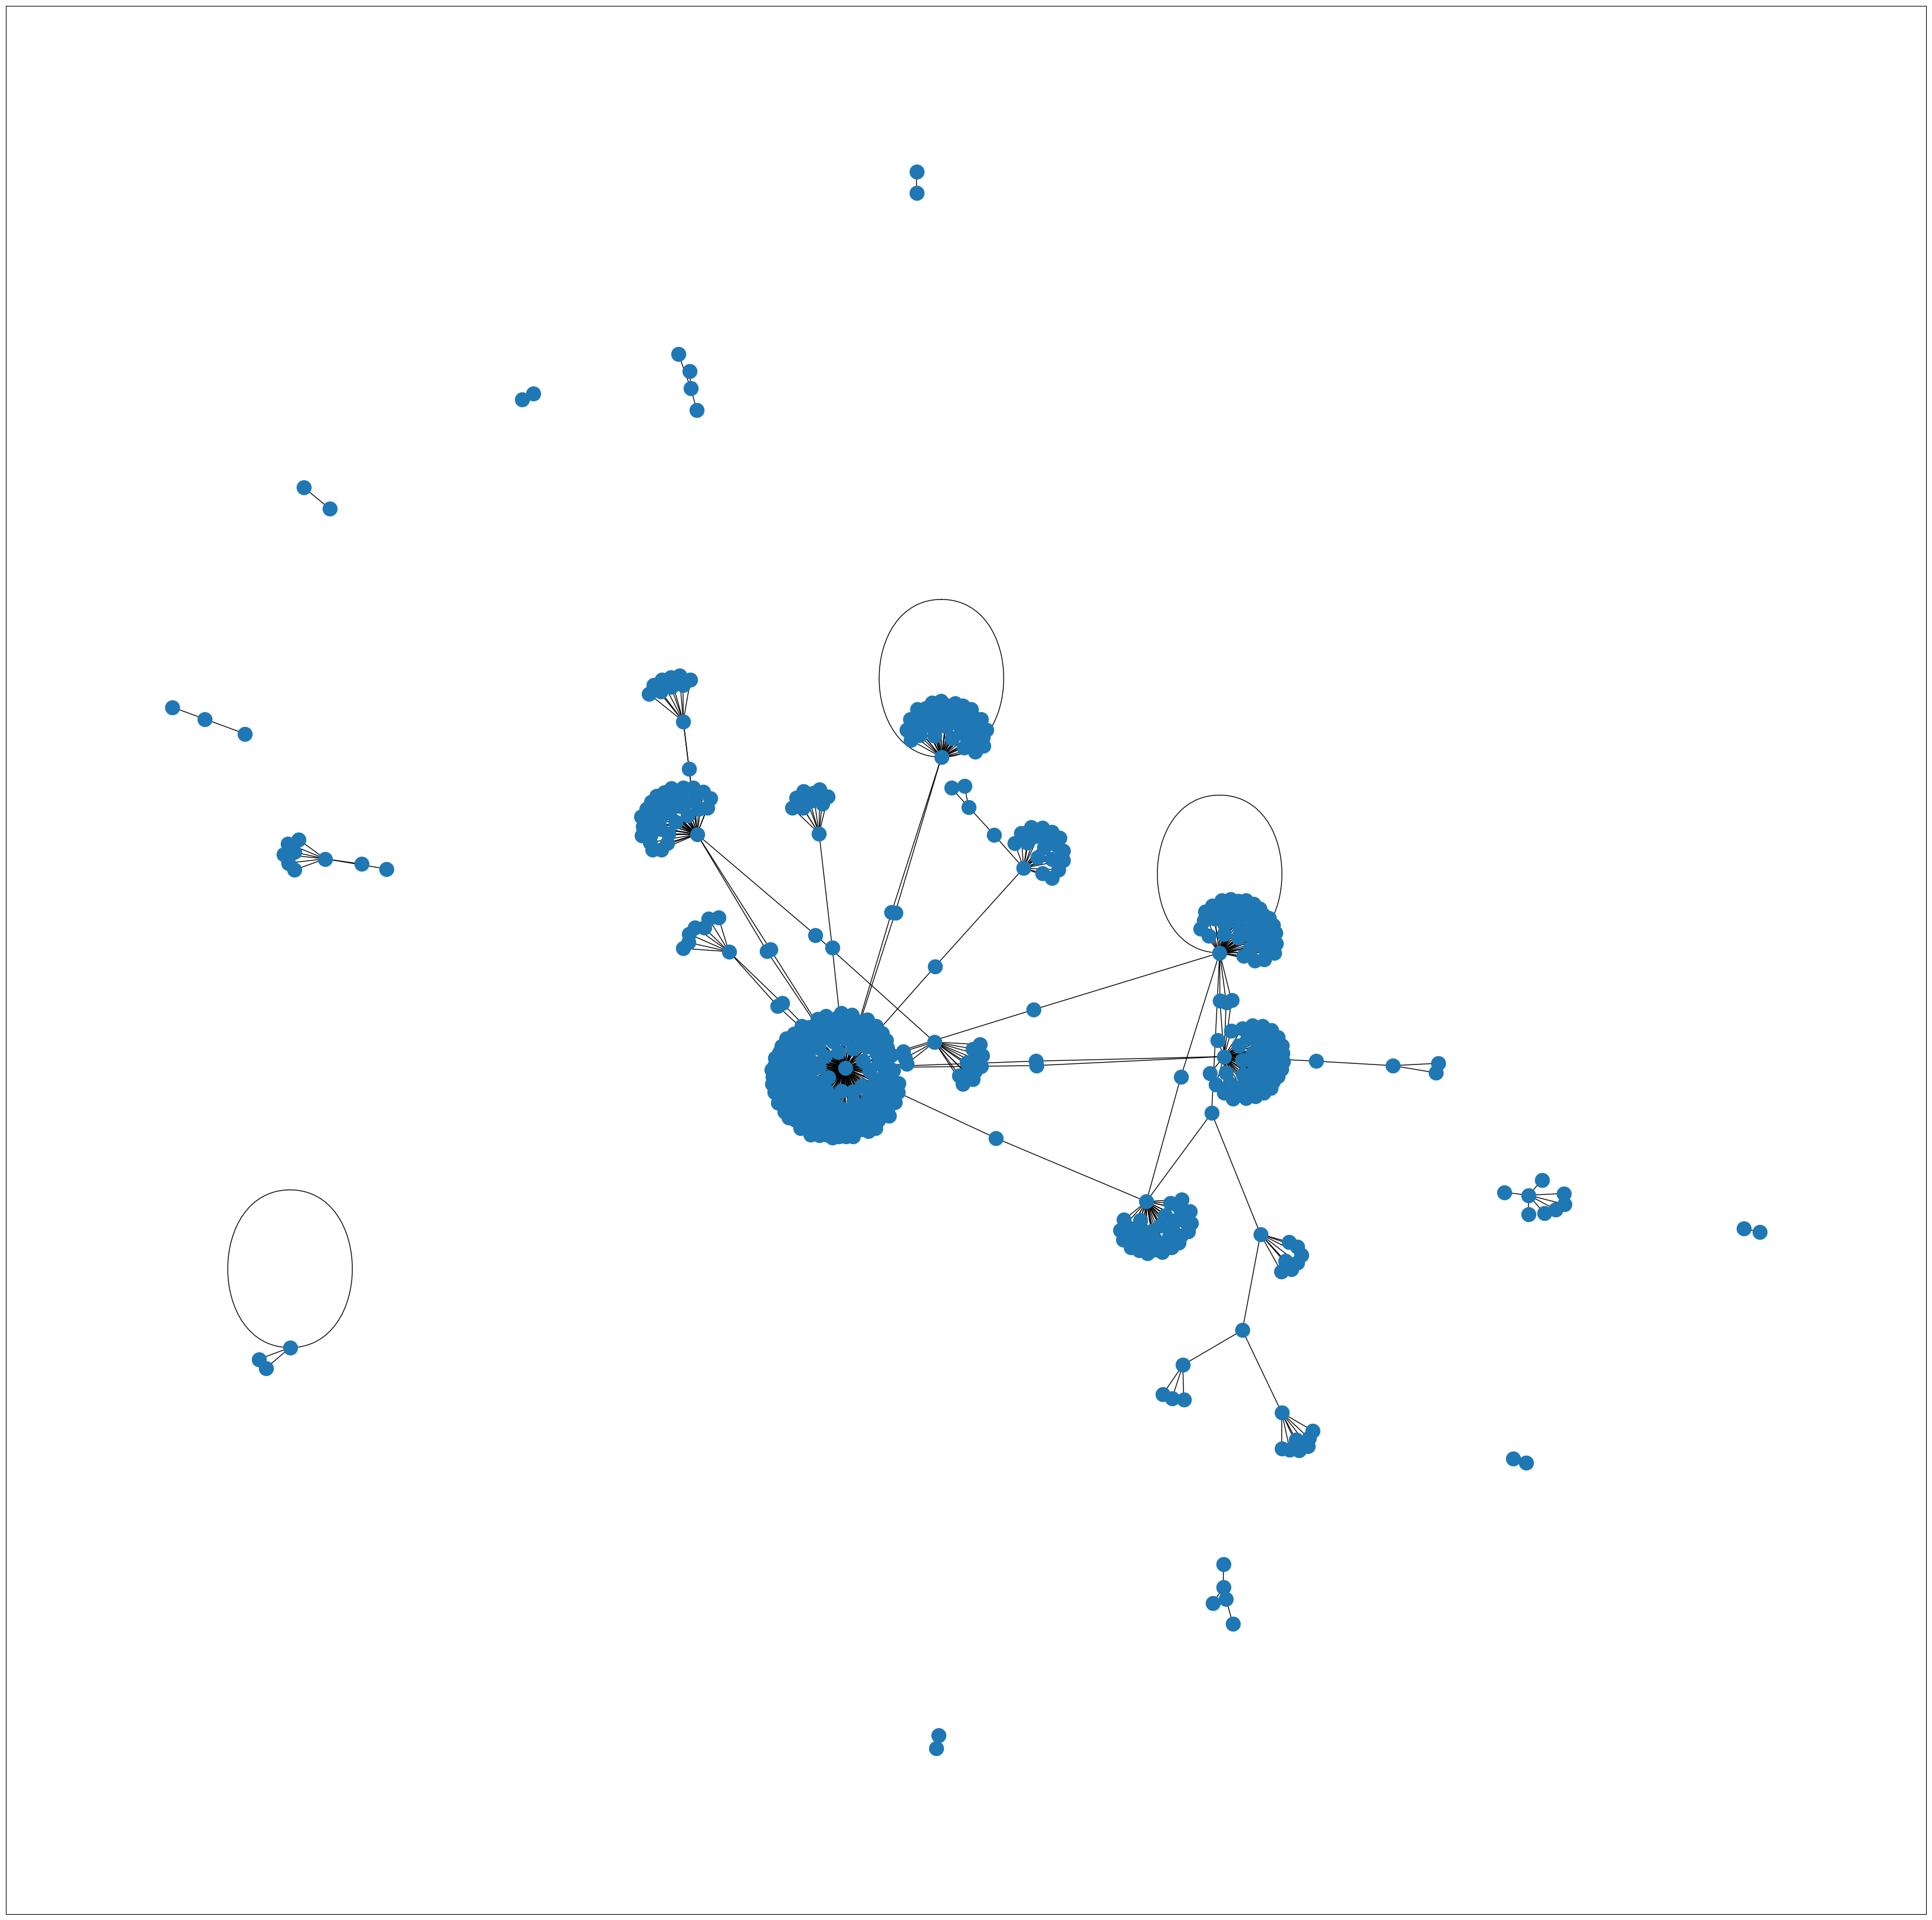

In [14]:
fig = plt.figure(figsize=(42,42))
nx.draw_networkx(G, with_labels=False)
plt.show()

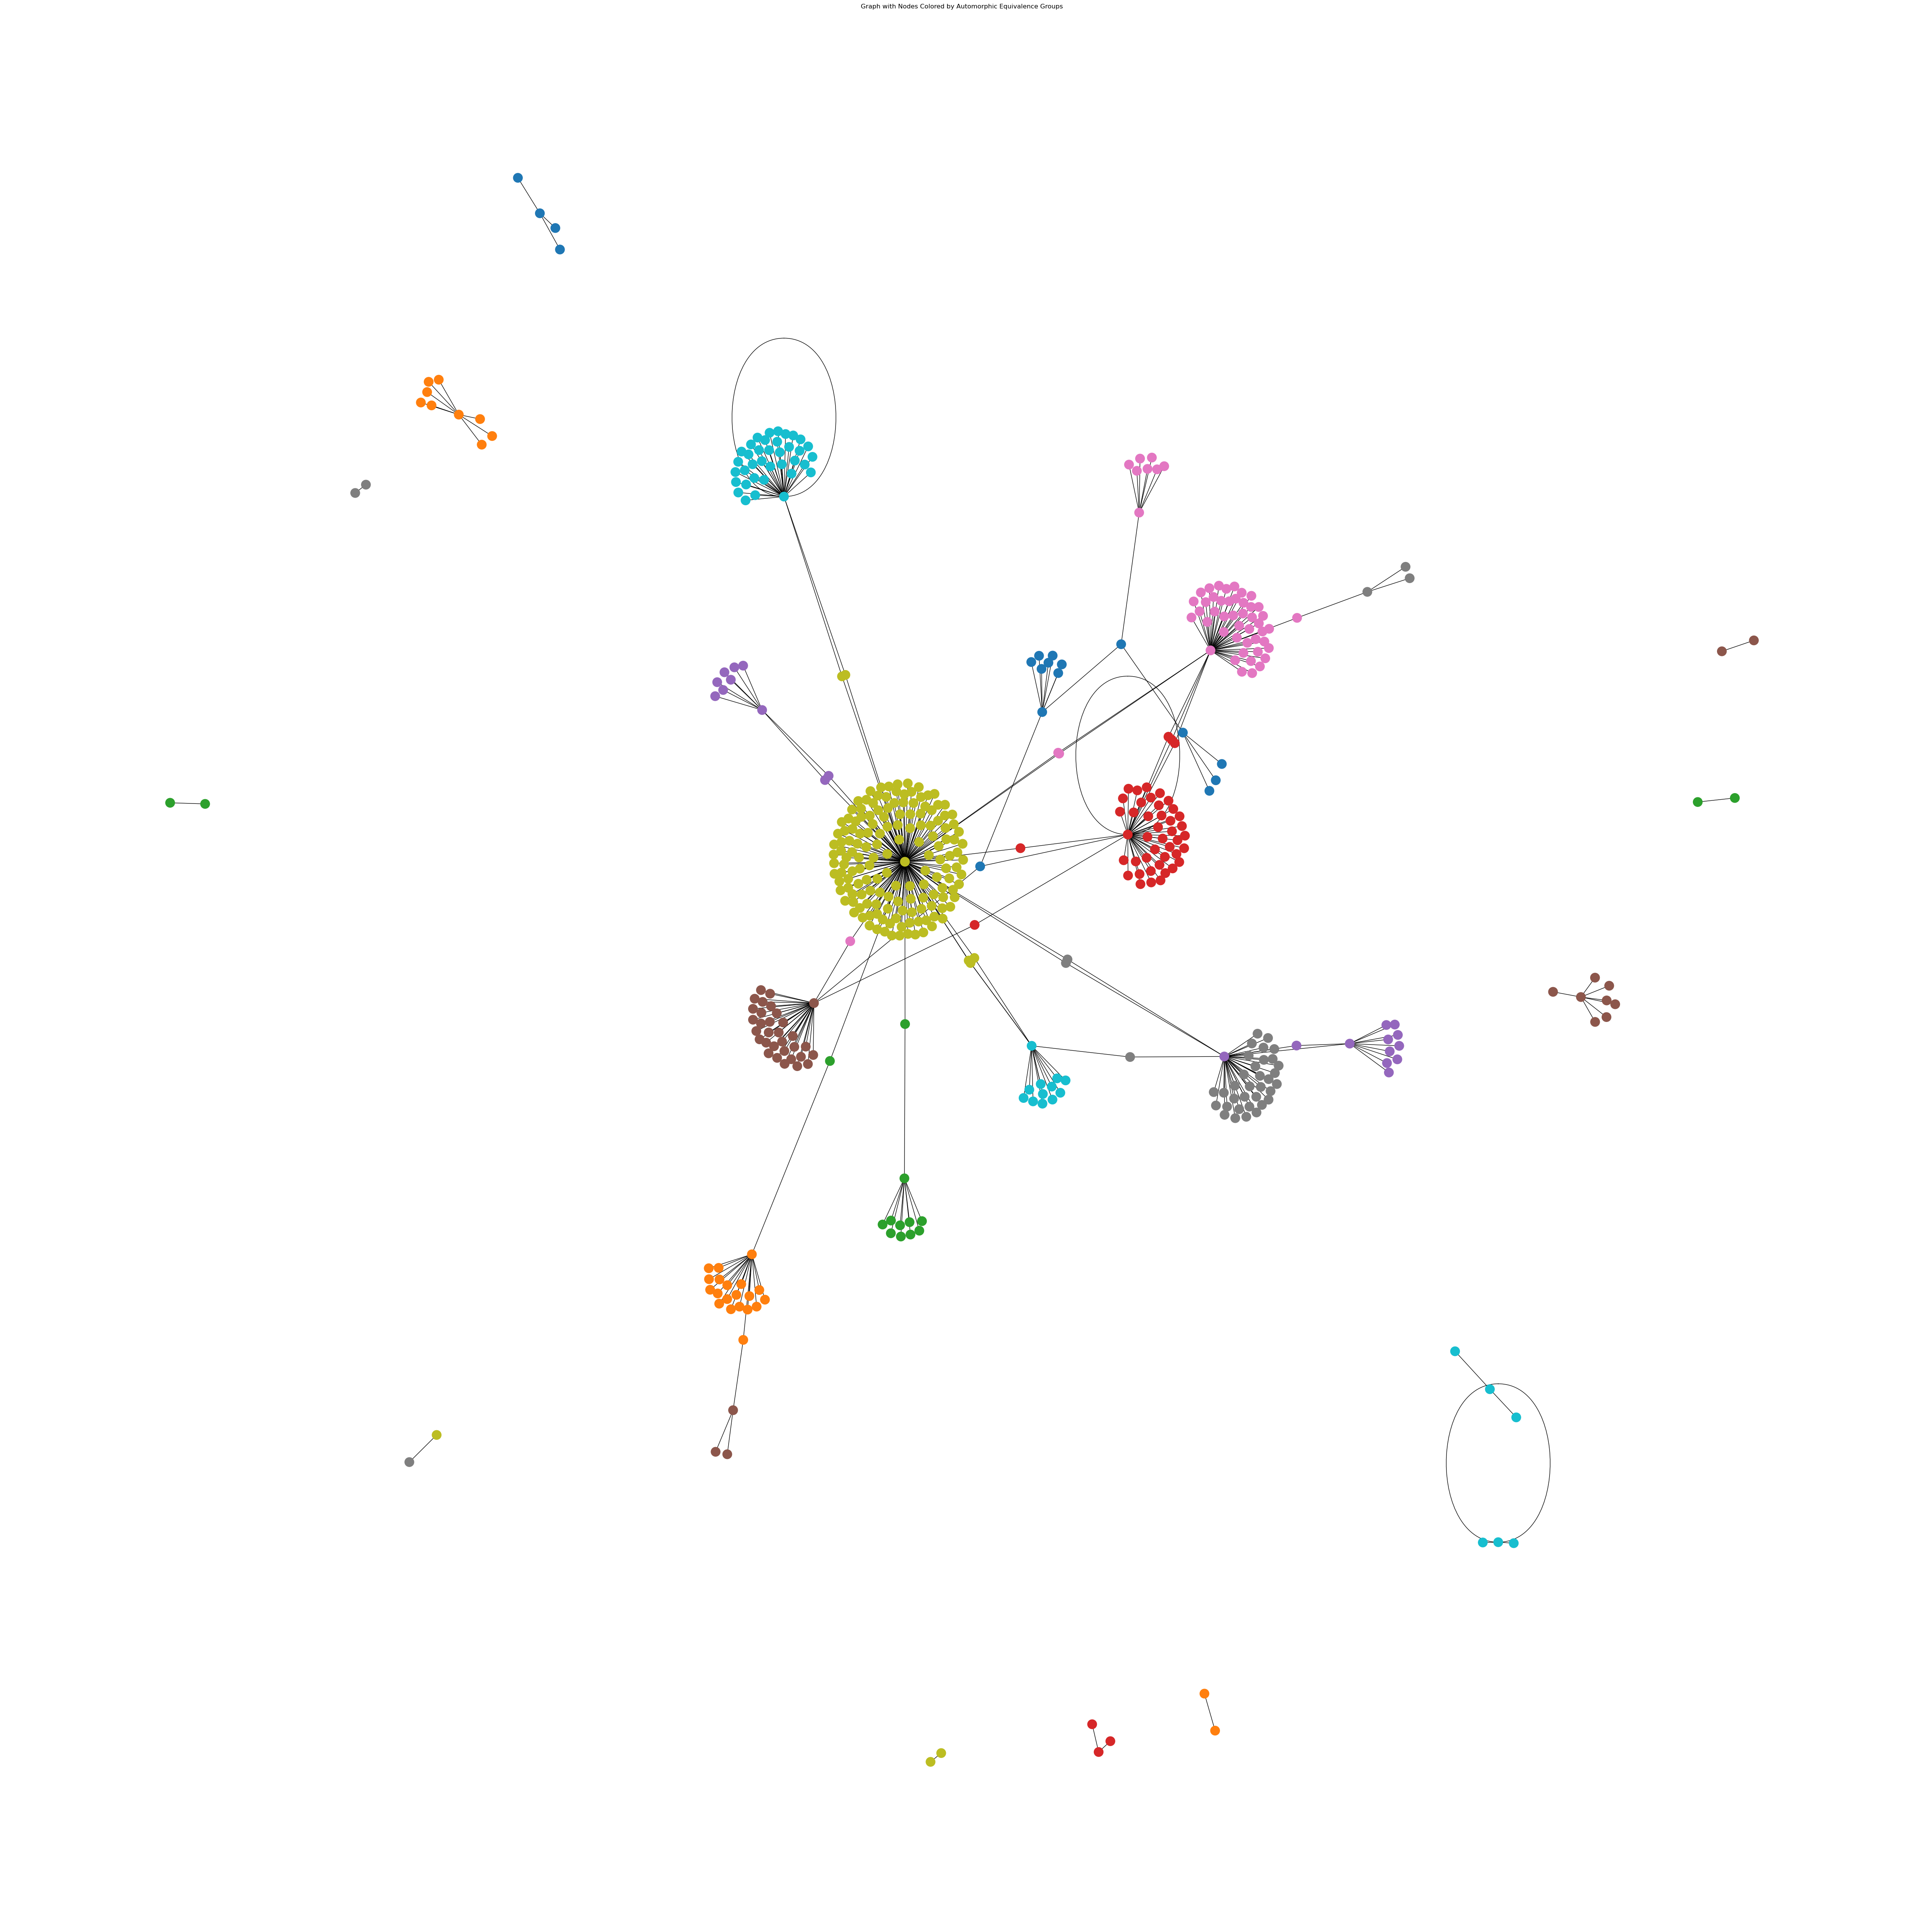

In [15]:
def find_automorphic_equivalent_nodes(graph):
    automorphic_equivalent = []
    nodes = list(graph.nodes())
    while nodes:
        node = nodes[0]
        automorphic_equivalent.append([node])
        neighbors = sorted(set(graph.neighbors(node)))
        nodes.remove(node)
        i = 0
        while i < len(automorphic_equivalent[-1]):
            curr_node = automorphic_equivalent[-1][i]
            for n in nodes[:]:
                if neighbors == sorted(set(graph.neighbors(n))):
                    automorphic_equivalent[-1].append(n)
                    nodes.remove(n)
            i += 1
    return automorphic_equivalent

# Find automorphically equivalent nodes
automorphic_equivalent_nodes = find_automorphic_equivalent_nodes(G)

# Create a color map for nodes based on automorphic equivalence groups
color_map = {}
for i, nodes in enumerate(automorphic_equivalent_nodes):
    for node in nodes:
        color_map[node] = i

# Assign a default color for nodes not in any group
default_color = len(automorphic_equivalent_nodes)
for node in G.nodes():
    if node not in color_map:
        color_map[node] = default_color

# Positions of nodes for visualization
pos = nx.spring_layout(G, seed=42)  # Positions of nodes for visualization

# Set figure size
plt.figure(figsize=(50, 50))

# Draw the graph with nodes colored by automorphic equivalence groups
node_colors = [color_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.tab10)
plt.title('Graph with Nodes Colored by Automorphic Equivalence Groups')
plt.show()

In [16]:
%pip install node2vec

Note: you may need to restart the kernel to use updated packages.


Computing transition probabilities:   0%|          | 0/498 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:04<00:00, 10.86it/s]


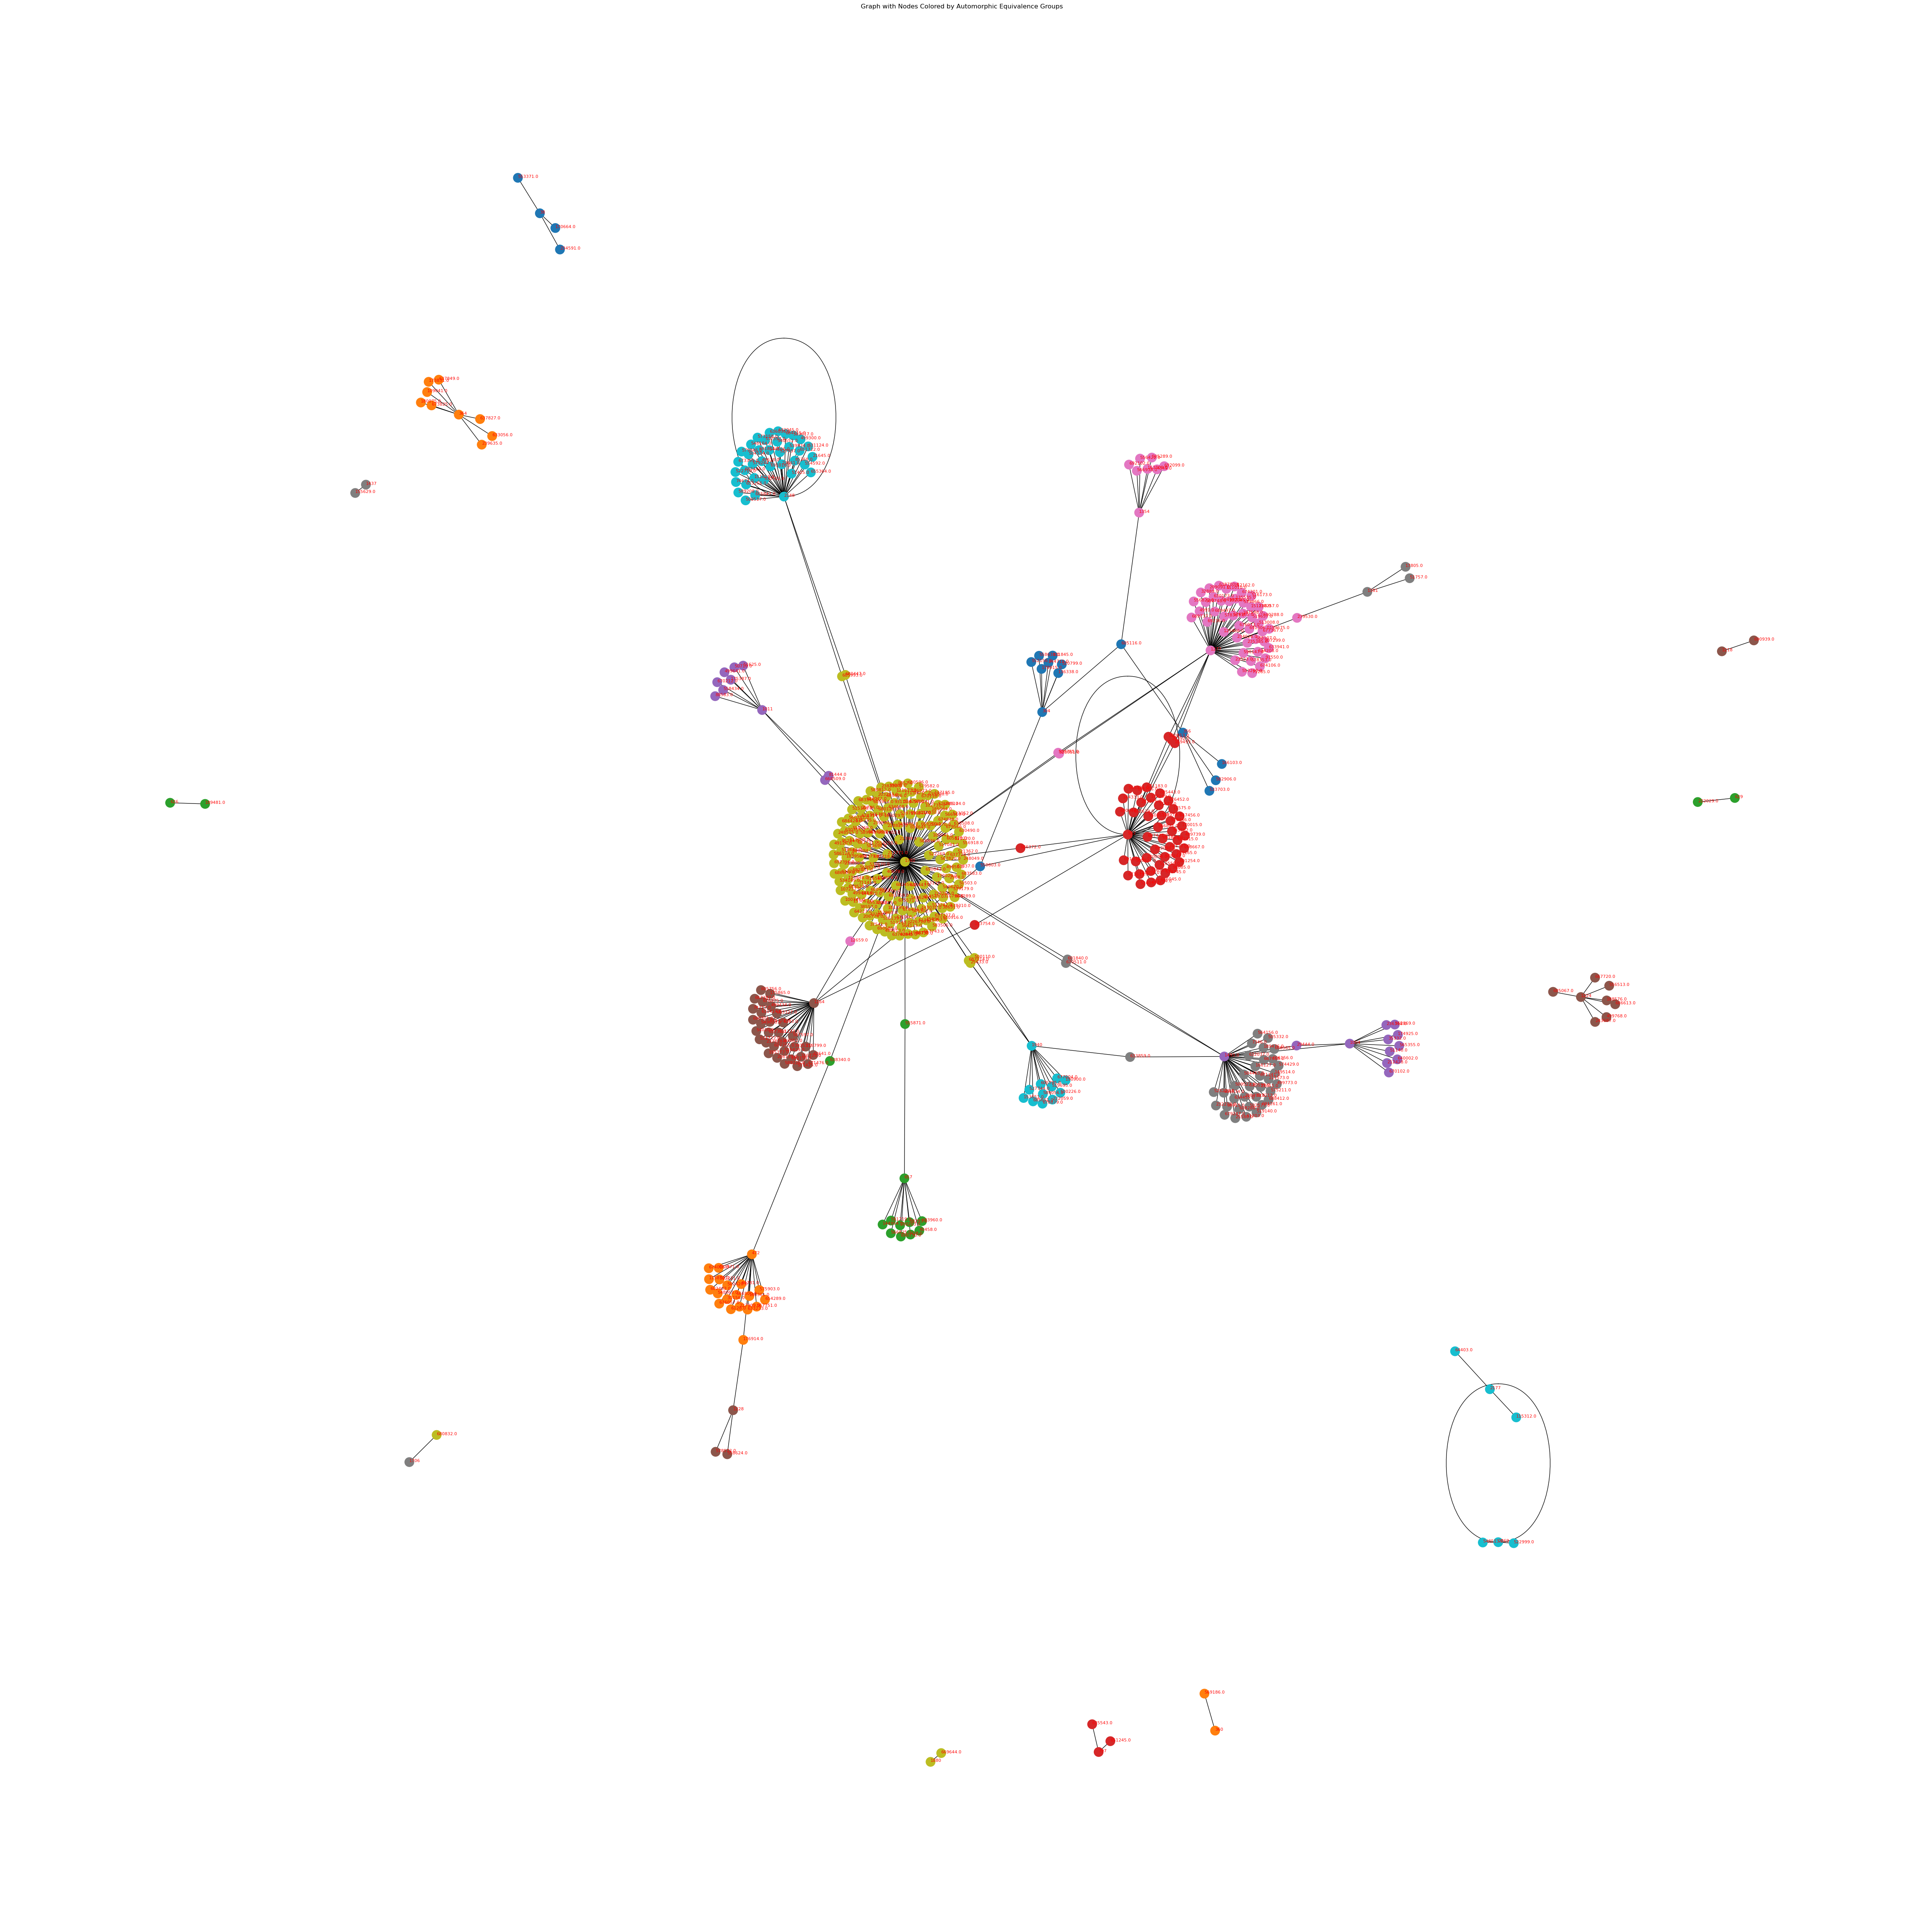

In [17]:
from node2vec import Node2Vec

#Creating a color map for nodes based on automorphic equivalence groups
color_map = {}
for i, nodes in enumerate(automorphic_equivalent_nodes):
    for node in nodes:
        color_map[node] = i

#Assigning a default color for nodes not in any group
default_color = len(automorphic_equivalent_nodes)
for node in G.nodes():
    if node not in color_map:
        color_map[node] = default_color

#Using node2vec for node embeddings
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

#Getting the node embeddings
node_embeddings = {str(node): model.wv[str(node)] for node in G.nodes()}


#Positions of nodes for visualization
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(50, 50))

#Drawing the graph with nodes colored by automorphic equivalence groups
node_colors = [color_map[node] for node in G.nodes()]
nx.draw(G, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.tab10)
plt.title('Graph with Nodes Colored by Automorphic Equivalence Groups')

#Displaying node2vec embeddings as labels
for node, (x, y) in pos.items():
    plt.text(x, y, node, color='red', fontsize=8)

plt.show()

In [18]:
from sklearn.cluster import KMeans

#Converting node embeddings to a NumPy array
embedding_array = np.array([model.wv[str(node)] for node in G.nodes()])

#Specifying the number of clusters/roles
num_clusters = 5

#Performing k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_assignments = kmeans.fit_predict(embedding_array)

#Assigning cluster labels to nodes
node_roles = {str(node): cluster for node, cluster in zip(G.nodes(), cluster_assignments)}
print(node_roles)

{'38': 4, '170664.0': 4, '234591.0': 4, '553371.0': 4, '304': 2, '101845.0': 2, '136338.0': 2, '178915.0': 2, '244715.0': 2, '520799.0': 2, '550603.0': 2, '552156.0': 2, '558638.0': 2, '605116.0': 2, '356': 2, '166103.0': 2, '533703.0': 2, '582906.0': 2, '360': 4, '569186.0': 4, '364': 4, '109041.0': 4, '173831.0': 4, '180075.0': 4, '239635.0': 4, '633056.0': 4, '637827.0': 4, '637849.0': 4, '673825.0': 4, '472': 1, '6128.0': 1, '31156.0': 1, '84781.0': 1, '115879.0': 1, '176914.0': 4, '180361.0': 1, '227909.0': 1, '502420.0': 1, '548063.0': 1, '562221.0': 1, '567751.0': 1, '575903.0': 1, '602403.0': 1, '633233.0': 1, '638340.0': 1, '653971.0': 1, '654289.0': 1, '666500.0': 1, '674016.0': 1, '676057.0': 1, '626': 4, '189481.0': 4, '629': 4, '222029.0': 4, '657': 1, '428.0': 1, '40458.0': 1, '88293.0': 1, '144954.0': 1, '200203.0': 1, '555871.0': 1, '566825.0': 1, '581219.0': 1, '603960.0': 1, '690730.0': 1, '797': 4, '635543.0': 4, '651245.0': 4, '932': 0, '15472.0': 0, '17575.0': 0, '

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


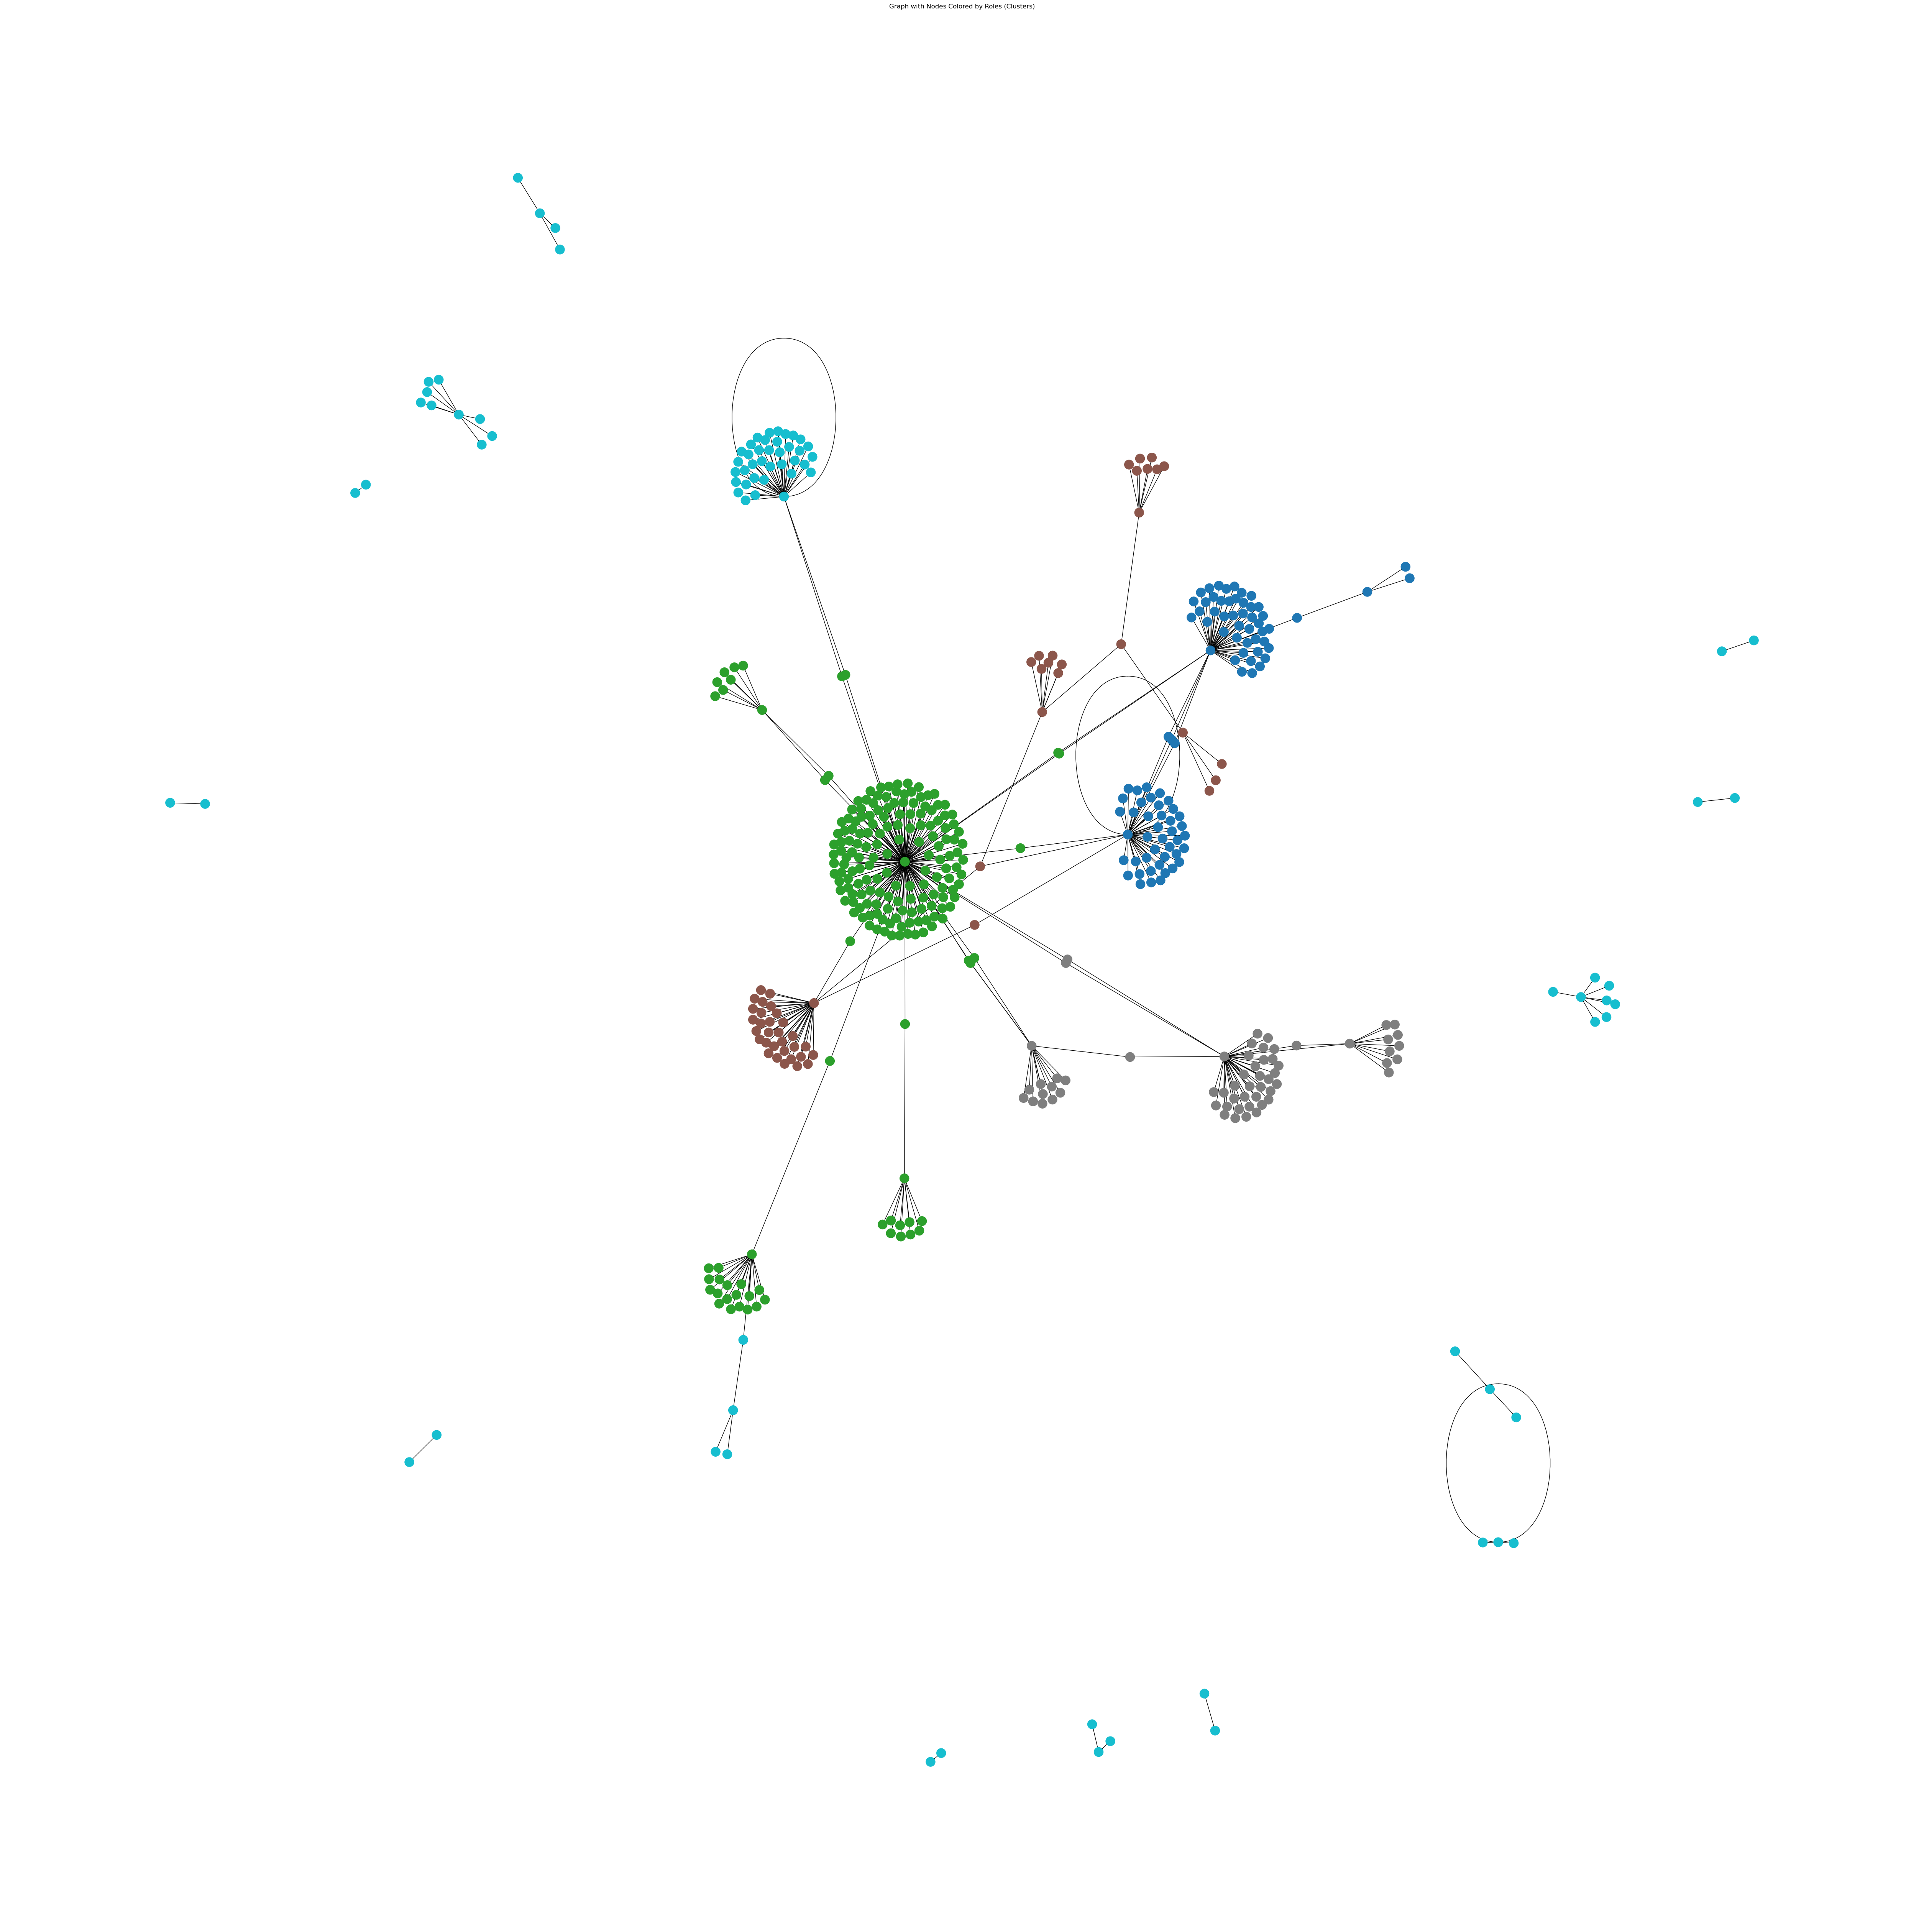

In [19]:
#Positions of nodes for visualization
pos = nx.spring_layout(G, seed=42)

#Setting figure size
plt.figure(figsize=(50, 50))

#Drawing the graph with nodes colored by roles
node_colors = [cluster_assignments[i] for i in range(len(G.nodes()))]
nx.draw(G, pos, node_color=node_colors, with_labels=False, cmap=plt.cm.tab10)
plt.title('Graph with Nodes Colored by Roles (Clusters)')
plt.show()